In [1]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4600, 5200, 25)
p = Page(ticker=Ticker.CAC5PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=11-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)


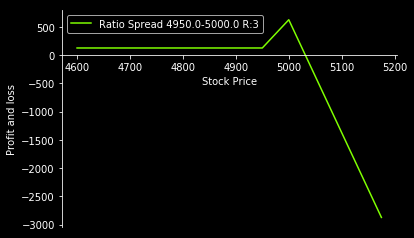

Cost-Butterfly : -127.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4950,long,1,608,60.8
Call,5000,short,3,-735,-24.5


627.0

In [3]:
rs = RatioSpread(call[4950], call[5000])
g.profit_strategy(rs)
print('Cost-Butterfly : {:0.02f}€'.format(rs.cost()))
g.display_summary(rs)
max(rs.payoff(g.sT))

In [ ]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

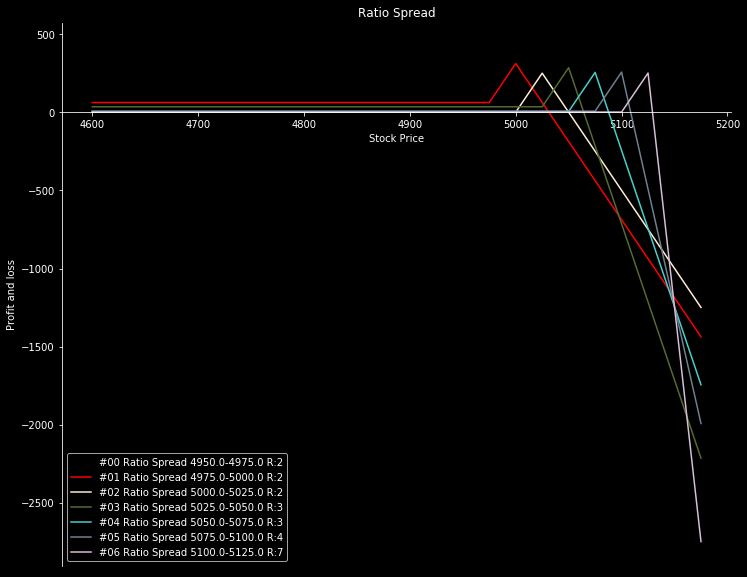

In [5]:
rss = RatioSpread.explorator(call.values(), step=25)
g.profit_rainbow(rss[6:], 'long', title='Ratio Spread')

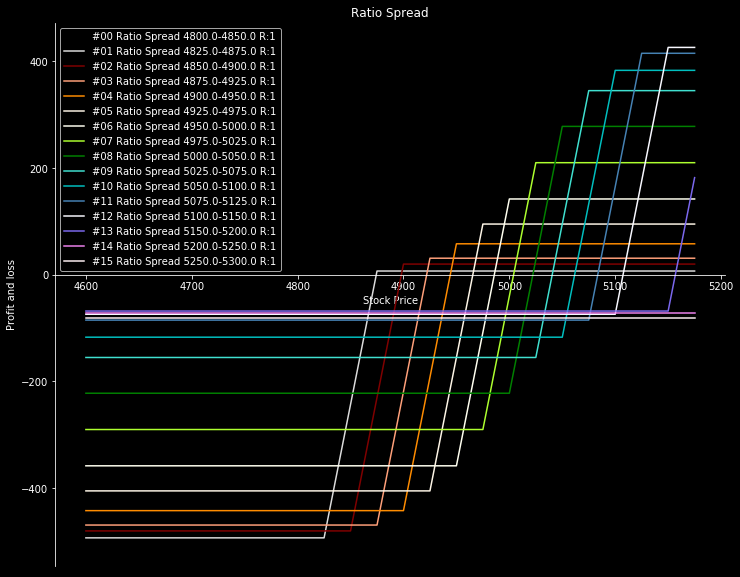

In [4]:
rss = RatioSpread.explorator(put.values(), step=50)
g.profit_rainbow(rss, 'long', title='Ratio Spread')